<a href="https://colab.research.google.com/github/Xfinity-bot/ML-Notebooks/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression**

In [7]:
import numpy as np

In [8]:
from IPython.lib.display import YouTubeVideo
X = 2*np.random.rand(100,1)
y= 4 +3*X+np.random.randn(100,1)

In [9]:
X_b = np.c_[np.ones((100,1)),X]

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T)
theta_best

array([[-0.01411112,  0.032561  ,  0.03988965,  0.00619986,  0.04001504,
        -0.00890648, -0.0001623 ,  0.04012145,  0.02582225, -0.01574816,
         0.02770973,  0.01490617, -0.00693911, -0.01159047,  0.02726862,
         0.02151827,  0.01374794, -0.00286635,  0.02725993,  0.02090399,
         0.02543759,  0.02623266, -0.01507916, -0.00500333,  0.00835948,
         0.03444621,  0.00482314, -0.00213852,  0.01903529,  0.02691842,
         0.02548705,  0.03667254, -0.00244729,  0.02358932,  0.0036869 ,
         0.01404408,  0.01847327,  0.0241788 ,  0.01250412,  0.02788345,
         0.00308837,  0.02840676, -0.01454814,  0.02730898, -0.01184898,
        -0.01466401,  0.03590759,  0.01580183,  0.04018851, -0.00900389,
         0.02874577, -0.01065904, -0.01111681, -0.00759287,  0.00984597,
        -0.01436368, -0.00923796, -0.01310838,  0.0259719 , -0.01272118,
         0.01628583, -0.01051385,  0.00066348,  0.01786012,  0.02103772,
        -0.00216747, -0.01543805, -0.00222272,  0.0

In [11]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[-0.01411112,  0.032561  ,  0.03988965,  0.00619986,  0.04001504,
        -0.00890648, -0.0001623 ,  0.04012145,  0.02582225, -0.01574816,
         0.02770973,  0.01490617, -0.00693911, -0.01159047,  0.02726862,
         0.02151827,  0.01374794, -0.00286635,  0.02725993,  0.02090399,
         0.02543759,  0.02623266, -0.01507916, -0.00500333,  0.00835948,
         0.03444621,  0.00482314, -0.00213852,  0.01903529,  0.02691842,
         0.02548705,  0.03667254, -0.00244729,  0.02358932,  0.0036869 ,
         0.01404408,  0.01847327,  0.0241788 ,  0.01250412,  0.02788345,
         0.00308837,  0.02840676, -0.01454814,  0.02730898, -0.01184898,
        -0.01466401,  0.03590759,  0.01580183,  0.04018851, -0.00900389,
         0.02874577, -0.01065904, -0.01111681, -0.00759287,  0.00984597,
        -0.01436368, -0.00923796, -0.01310838,  0.0259719 , -0.01272118,
         0.01628583, -0.01051385,  0.00066348,  0.01786012,  0.02103772,
        -0.00216747, -0.01543805, -0.00222272,  0.0

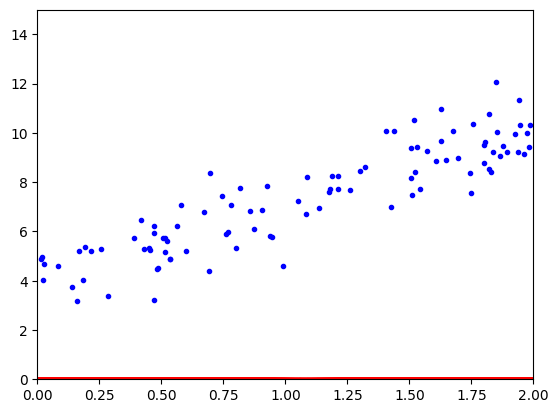

In [12]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

# **SKLEARN**

In [13]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.01480621]), array([[3.07404581]]))

In [14]:
lin_reg.predict(X_new)

array([[ 4.01480621],
       [10.16289783]])

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.01480621],
       [3.07404581]])

# **GRADIENT DESCENT**

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.01480621],
       [3.07404581]])

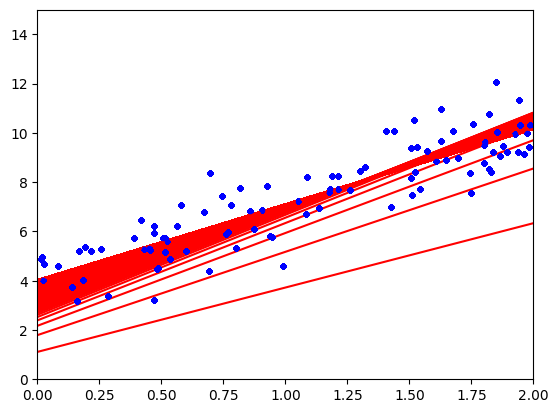

In [17]:
eta = 0.1
n_iterations = 1000
m = 100


theta = np.random.randn(2,1)
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)),X_new]
  y_predict = X_new_b.dot(theta)
  plt.plot(X_new,y_predict,"r-")
  plt.plot(X,y,"b.")
  plt.axis([0,2,0,15])
plt.show()

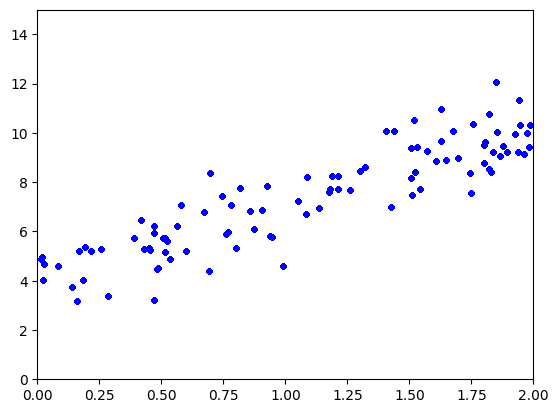

In [18]:
n_epochs =50
t0,t1 = 5,50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gardients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta = theta - eta * gradients
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new,y_predict,"r-")
    plt.plot(X,y,"b.")
    plt.axis([0,2,0,15])
plt.show()

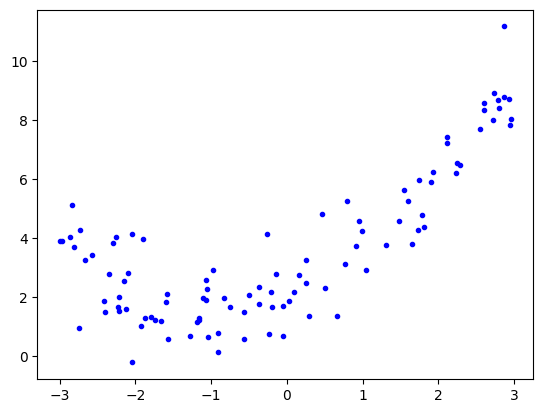

In [19]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 *X**2 + X + 2 +np.random.randn(m,1)
plt.plot(X,y,"b.")